Recently [Simon Garier]() created [several visualisations]() from a [football dataset](https://github.com/jalapic/engsoccerdata) compiled by [James Curley]() showing statistics on match performances in the English Premier League.

In [572]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

plt.style.use('ramiro')

df = pd.read_csv('csv/bundesliga.csv', parse_dates=['date'], encoding='latin-1')

chartinfo = 'Author: Ramiro Gómez - ramiro.org • Data: James Curley - github.com/jalapic/engsoccerdata'
infosize = 13

In [531]:
print(df.columns)
df.describe()

Index(['date', 'Season', 'home', 'visitor', 'FT', 'hgoal', 'vgoal', 'tier'], dtype='object')


,Season,hgoal,vgoal,tier
count,15508.000000,15508.000000,15508.000000,15508
mean,1988.215115,1.872517,1.202863,1
std,14.591496,1.459254,1.162654,0
min,1963.000000,0.000000,0.000000,1
25%,1976.000000,1.000000,0.000000,1
50%,1988.000000,2.000000,1.000000,1
75%,2001.000000,3.000000,2.000000,1
max,2013.000000,12.000000,9.000000,1


In [583]:
df.sort('date').tail()

,date,Season,home,visitor,FT,hgoal,vgoal,tier
14584,2014-05-10,2013,Bayer Leverkusen,Werder Bremen,2-1,2,1,1
14583,2014-05-10,2013,Bayern München,VfB Stuttgart,1-0,1,0,1
14582,2014-05-10,2013,VfL Wolfsburg,Bor. Mönchengladbach,3-1,3,1,1
14585,2014-05-10,2013,FC Schalke 04,1. FC Nürnberg,4-1,4,1,1
14589,2014-05-10,2013,FC Augsburg,Eintracht Frankfurt,2-1,2,1,1


In [534]:
def result(row):
    if row.hgoal > row.vgoal:
        return 'Home win'
    elif row.hgoal < row.vgoal:
        return 'Home loss'
    return 'Tie'

df['resulttype'] = df.apply(result, axis=1)

In [539]:
resulttypes_by_season = df.groupby(['Season', 'resulttype']).agg(['count'])['date']

In [540]:
#resulttypes_by_season.plot(kind='bar', stacked=True, figsize=(14, 6))
df_rs = resulttypes_by_season.unstack()
df_rs.head()

count             
resulttype Home loss Home win Tie
Season                           
1963              53      126  61
1964              56      122  62
1965              70      168  68
1966              64      158  84
1967              66      167  73

In [541]:
df_rs = df_rs.apply(lambda x: 100 * x / float(x.sum()), axis=1)
df_rs.head()

count                      
resulttype  Home loss   Home win        Tie
Season                                     
1963        22.083333  52.500000  25.416667
1964        23.333333  50.833333  25.833333
1965        22.875817  54.901961  22.222222
1966        20.915033  51.633987  27.450980
1967        21.568627  54.575163  23.856209

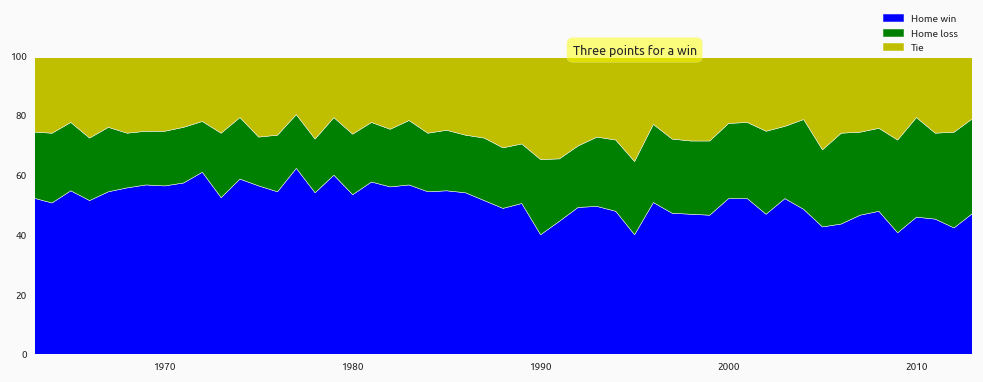

In [542]:
s1 = df_rs['count']['Home win']
s2 = df_rs['count']['Home loss']
s3 = df_rs['count']['Tie']

xmax = df_rs.index.max()
xmin = df_rs.index.min()

fig, ax = plt.subplots(figsize=(15, 5))

ax.stackplot(df_rs.index, [s1, s2, s3], colors=['b', 'g', 'y'], baseline='zero')
ax.set_xlim(xmin, xmax)
ax.set_ylim(0, 100)

p1 = mpatches.Patch(color='b', label='Home win')
p2 = mpatches.Patch(color='g', label='Home loss')
p3 = mpatches.Patch(color='y', label='Tie')

plt.legend(loc=(.9, 1), handles=[p1, p2, p3])

plt.annotate(
    'Three points for a win',
    xy=(1995, 100), 
    arrowprops=dict(arrowstyle='-'),
    ha='center',
    va='bottom',
    size=12.5,
    bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))

plt.show()


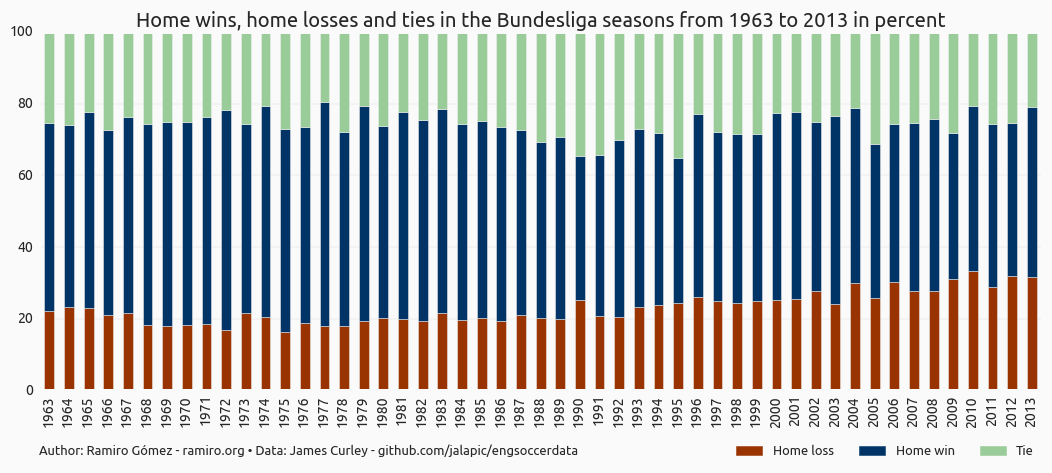

In [584]:
colors = ['#993300', '#003366', '#99cc99']

title = 'Home wins, home losses and ties in the Bundesliga seasons from {} to {} in percent'.format(xmin, xmax)
ax = df_rs.plot(kind='bar', stacked=True, figsize=(16, 6), color=colors, title=title, fontsize=14)
ax.set_ylim([0, 100])
ax.set_xlabel('', visible=False)

p1 = mpatches.Patch(color=colors[0], label='Home loss')
p2 = mpatches.Patch(color=colors[1], label='Home win')
p3 = mpatches.Patch(color=colors[2], label='Tie')

ax.legend(loc=(.69, -.2), handles=[p1, p2, p3], ncol=3, fontsize=13)
ax.annotate(chartinfo, xy=(0, -1.18), xycoords='axes fraction', fontsize=infosize)

Home goals vs away goals scatterplot aggreagated for each match day.